### Importing Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [3]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X, y

(array([[    19,  19000],
        [    35,  20000],
        [    26,  43000],
        [    27,  57000],
        [    19,  76000],
        [    27,  58000],
        [    27,  84000],
        [    32, 150000],
        [    25,  33000],
        [    35,  65000],
        [    26,  80000],
        [    26,  52000],
        [    20,  86000],
        [    32,  18000],
        [    18,  82000],
        [    29,  80000],
        [    47,  25000],
        [    45,  26000],
        [    46,  28000],
        [    48,  29000],
        [    45,  22000],
        [    47,  49000],
        [    48,  41000],
        [    45,  22000],
        [    46,  23000],
        [    47,  20000],
        [    49,  28000],
        [    47,  30000],
        [    29,  43000],
        [    31,  18000],
        [    31,  74000],
        [    27, 137000],
        [    21,  16000],
        [    28,  44000],
        [    27,  90000],
        [    35,  27000],
        [    33,  28000],
        [    30,  49000],
        [   

### Splitting the data

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train, X_test, y_train, y_test

(array([[    26,  15000],
        [    60, 102000],
        [    38, 112000],
        [    40, 107000],
        [    42,  53000],
        [    35,  59000],
        [    48,  41000],
        [    48, 134000],
        [    38, 113000],
        [    29, 148000],
        [    26,  15000],
        [    60,  42000],
        [    24,  19000],
        [    42, 149000],
        [    46,  96000],
        [    28,  59000],
        [    39,  96000],
        [    28,  89000],
        [    41,  72000],
        [    45,  26000],
        [    33,  69000],
        [    20,  82000],
        [    31,  74000],
        [    42,  80000],
        [    35,  72000],
        [    33, 149000],
        [    40,  71000],
        [    51, 146000],
        [    46,  79000],
        [    35,  75000],
        [    38,  51000],
        [    36,  75000],
        [    37,  78000],
        [    38,  61000],
        [    60, 108000],
        [    20,  82000],
        [    57,  74000],
        [    42,  65000],
        [   

### Performing Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train, X_test

(array([[-1.1631724 , -1.5849703 ],
        [ 2.17018137,  0.93098672],
        [ 0.0133054 ,  1.22017719],
        [ 0.20938504,  1.07558195],
        [ 0.40546467, -0.48604654],
        [-0.28081405, -0.31253226],
        [ 0.99370357, -0.8330751 ],
        [ 0.99370357,  1.8563962 ],
        [ 0.0133054 ,  1.24909623],
        [-0.86905295,  2.26126285],
        [-1.1631724 , -1.5849703 ],
        [ 2.17018137, -0.80415605],
        [-1.35925203, -1.46929411],
        [ 0.40546467,  2.2901819 ],
        [ 0.79762394,  0.75747245],
        [-0.96709276, -0.31253226],
        [ 0.11134522,  0.75747245],
        [-0.96709276,  0.55503912],
        [ 0.30742485,  0.06341534],
        [ 0.69958412, -1.26686079],
        [-0.47689368, -0.0233418 ],
        [-1.7514113 ,  0.3526058 ],
        [-0.67297331,  0.12125343],
        [ 0.40546467,  0.29476771],
        [-0.28081405,  0.06341534],
        [-0.47689368,  2.2901819 ],
        [ 0.20938504,  0.03449629],
        [ 1.28782302,  2.203

### Training the model

In [6]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=70, criterion='entropy')

classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=70)

### Performing K-Fold Cross Validation

In [7]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
accuracies

array([0.89285714, 0.82142857, 0.75      , 0.89285714, 0.89285714,
       0.78571429, 0.92857143, 0.89285714, 0.92857143, 0.96428571])

In [8]:
accuracies.mean()

0.875

### Predicting the test result

In [9]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1], dtype=int64)

### Displaying the confusion matrix

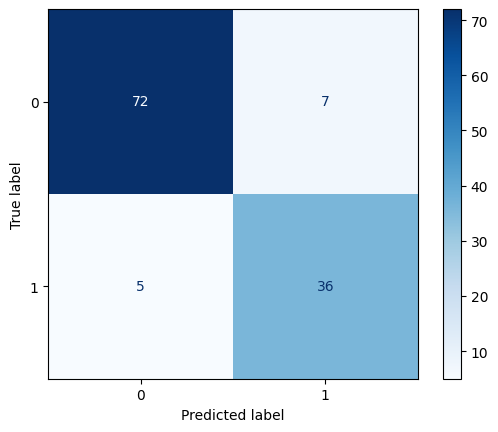

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [11]:
accuracy_score(y_test, y_pred)

0.9